Analyzing how well the median values of the posterior distribution can recover some of the input parameters.

Normal FoV and lensing models with external shear.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import re
from astropy.io import fits

In [2]:
data_path  = "/home/carlosmelo/Documents/GitHub/Illustris/my_illustris/"


subhalos = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "172209", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]
Nsubhalos = len(subhalos)

## DM parameters

In [3]:
JAM_slope    = np.empty([Nsubhalos, 3])   # Median, lower unc, upper unc
dyLens_slope = np.empty([Nsubhalos, 3])   # Median, lower unc, upper unc

slope   = np.empty([Nsubhalos])  # True slope in arcsec
slope_err  = np.empty([Nsubhalos,2])  # 1\sigma error



In [4]:


for i, s in enumerate(subhalos):
    
    ## Reading the data
    with open("{}/TNG50-1-snap84-subhalo{}/dm/dm_nonlinear_rst.json".format(data_path,s)) as f:
        DM = json.load(f)
        f.close()
    
    slope[i]     = DM["gamma"][1]
    slope_err[i] = np.diff(DM["gamma"])
    
    with open("./{}/model4/normal/JAM/results.rst".format(s), 'r') as file_JAM:
        # Read all lines
        JAM = file_JAM.readlines()
    JAM = JAM[4:]                       # Skip the header

    
        # Slope
    JAM_slope[i][0] = JAM[-1].split()[1]   # Median
    JAM_slope[i][1], JAM_slope[i][2] = re.findall(r'\((-?\d+\.\d+)\)', JAM[-1].split()[2]) # lower and upper limits


    with open("./{}/model4/normal/shear/dyLens/phase5/results.rst".format(s), 'r') as file_dyLens:
        # Read all lines
        dyLens = file_dyLens.readlines()
    dyLens = dyLens[4:]                       # Skip the header
        
        # Slope
    dyLens_slope[i][0] = dyLens[-3].split()[1]   # Median
    dyLens_slope[i][1], dyLens_slope[i][2] = re.findall(r'\((-?\d+\.\d+)\)', dyLens[-3].split()[2]) # lower and upper limits

In [5]:
def median_hi_lo(dataset):
    # Return the median, hi and low percentiles
    p = np.percentile(dataset, [16, 50, 84])
    median = p[1]
    hi, lo = np.diff(p)
    
    return median, hi, lo

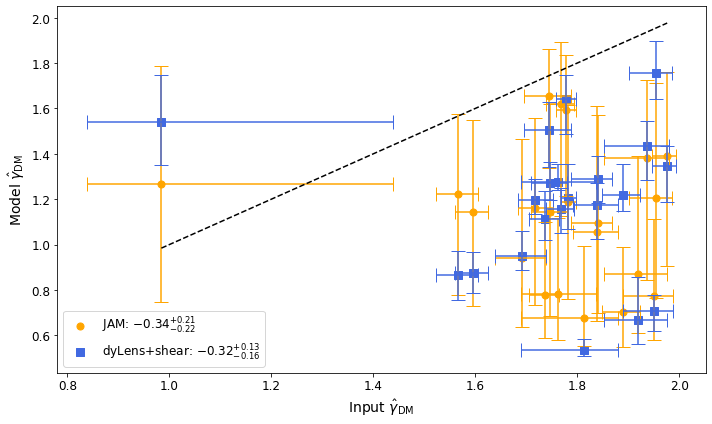

In [6]:
## Bias as a function of the Triaxiality

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Criar a figura com subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Adicionar os dados aos subplots
    # DM slope
    
#JAM
m, hi, lo = median_hi_lo( (JAM_slope[:,0] - slope)/slope )    
axs.scatter(x=slope, y=JAM_slope[:,0], s=50, color="orange", marker="o",
                      label="JAM: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs.errorbar(x=slope, y=JAM_slope[:,0], yerr=abs(JAM_slope[:,1:3].T), xerr=abs(slope_err.T),
                      ls="None", color="orange", capsize=7)

#dyLens
m, hi, lo = median_hi_lo( (dyLens_slope[:,0] - slope)/slope )    
axs.scatter(x=slope, y=dyLens_slope[:,0], s=50, color="royalblue", marker="s",
                      label="dyLens+shear: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs.errorbar(x=slope, y=dyLens_slope[:,0], yerr=abs(dyLens_slope[:,1:3].T), xerr=abs(slope_err.T),
                      ls="None", color="royalblue", capsize=7)

axs.set_ylabel(r"Model $\hat{\gamma}_{\rm DM}$", size=14)
axs.set_xlabel(r"Input $\hat{\gamma}_{\rm DM}$", size=14)
axs.legend(fontsize=12)
r = np.linspace(slope.min(), slope.max())
axs.plot(r, r, color="black", linestyle="--")


# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()

## Stellar parameters

In [7]:
JAM_beta    = np.empty([Nsubhalos, 3])   # Median, lower unc, upper unc
dyLens_beta = np.empty([Nsubhalos, 3])   # Median, lower unc, upper unc

JAM_ml    = np.empty([Nsubhalos, 3])   # Median, lower unc, upper unc
dyLens_ml = np.empty([Nsubhalos, 3])   # Median, lower unc, upper unc

betaz  = np.empty([Nsubhalos])  # True stellar anisotropy radius in arcsec
ml     = np.empty([Nsubhalos])  # True ML


In [8]:
model_path = "./"
data_path  = "/home/carlosmelo/Documents/GitHub/Illustris/my_illustris/"

for i, s in enumerate(subhalos):
    
    ## Reading the data

    log_img  = fits.open("{}/TNG50-1-snap84-subhalo{}/imgs/log_img.fits".format(data_path,s))[1].data
    betaz[i] = log_img["betaZ"]
    ml[i]    = log_img["M/L"]
    
    ## Reading models
    
    with open("{}/{}/model4/normal/JAM/results.rst".format(model_path, s), 'r') as file_JAM:
        # Read all lines
        JAM = file_JAM.readlines()
    JAM = JAM[4:]                       # Skip the header

        # beta
    JAM_beta[i][0] = JAM[1].split()[1]   # Median
    JAM_beta[i][1], JAM_beta[i][2] = re.findall(r'\((-?\d+\.\d+)\)', JAM[1].split()[2]) # lower and upper limits
    
        # ml
    JAM_ml[i][0] = JAM[2].split()[1]   # Median
    JAM_ml[i][1], JAM_ml[i][2] = re.findall(r'\((-?\d+\.\d+)\)', JAM[2].split()[2]) # lower and upper limits


    with open("{}/{}/model4/normal/shear/dyLens/phase5/results.rst".format(model_path, s), 'r') as file_dyLens:
        # Read all lines
        dyLens = file_dyLens.readlines()
    dyLens = dyLens[4:]                       # Skip the header
        
        # beta
    dyLens_beta[i][0] = dyLens[1].split()[1]   # Median
    dyLens_beta[i][1], dyLens_beta[i][2] = re.findall(r'\((-?\d+\.\d+)\)', dyLens[1].split()[2]) # lower and upper limits
    
        # ml
    dyLens_ml[i][0] = dyLens[2].split()[1]   # Median
    dyLens_ml[i][1], dyLens_ml[i][2] = re.findall(r'\((-?\d+\.\d+)\)', dyLens[2].split()[2]) # lower and upper limits

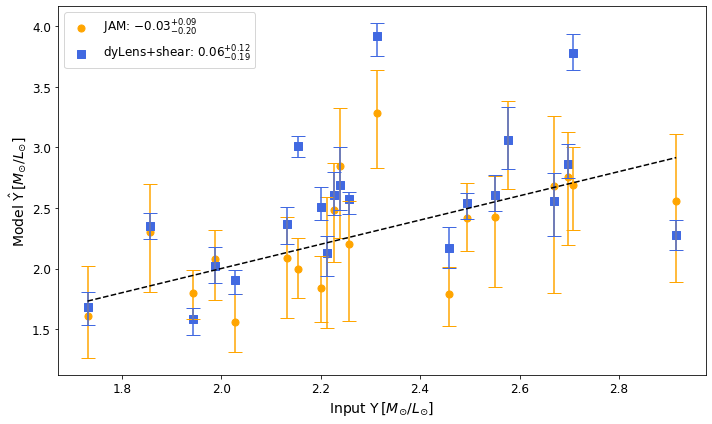

In [9]:
## Bias as a function of the Triaxiality

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Criar a figura com subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Adicionar os dados aos subplots
    # ML
    
#JAM
m, hi, lo = median_hi_lo( (JAM_ml[:,0] - ml)/ml )    
axs.scatter(x=ml, y=JAM_ml[:,0], s=50, color="orange", marker="o",
                      label="JAM: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs.errorbar(x=ml, y=JAM_ml[:,0], yerr=abs(JAM_ml[:,1:3].T), 
                      ls="None", color="orange", capsize=7)


#dyLens
m, hi, lo = median_hi_lo( (dyLens_ml[:,0] - ml)/ml )    
axs.scatter(x=ml, y=dyLens_ml[:,0], s=50, color="royalblue", marker="s",
                      label="dyLens+shear: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs.errorbar(x=ml, y=dyLens_ml[:,0], yerr=abs(dyLens_ml[:,1:3].T), 
                      ls="None", color="royalblue", capsize=7)

axs.set_ylabel(r"Model $\hat{\Upsilon} \, [M_{\odot}/L_{\odot}]$", size=14)
axs.set_xlabel(r"Input $\Upsilon \, [M_{\odot}/L_{\odot}]$", size=14)
axs.legend(fontsize=12)
r = np.linspace(ml.min(), ml.max())
axs.plot(r, r, color="black", linestyle="--")


# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()

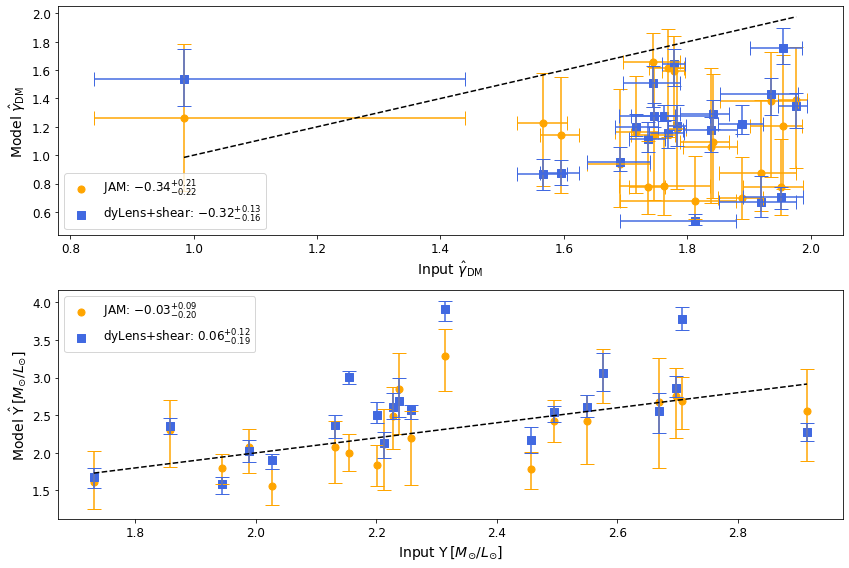

In [10]:
## Bias as a function of the Triaxiality

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Criar a figura com subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Adicionar os dados aos subplots
    #  ML

#JAM
m, hi, lo = median_hi_lo( (JAM_ml[:,0] - ml)/ml )    
axs[1].scatter(x=ml, y=JAM_ml[:,0], s=50, color="orange", marker="o",
                      label="JAM: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[1].errorbar(x=ml, y=JAM_ml[:,0], yerr=abs(JAM_ml[:,1:3].T), 
                      ls="None", color="orange", capsize=7)


#dyLens
m, hi, lo = median_hi_lo( (dyLens_ml[:,0] - ml)/ml )    
axs[1].scatter(x=ml, y=dyLens_ml[:,0], s=50, color="royalblue", marker="s",
                      label="dyLens+shear: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[1].errorbar(x=ml, y=dyLens_ml[:,0], yerr=abs(dyLens_ml[:,1:3].T), 
                      ls="None", color="royalblue", capsize=7)

axs[1].set_ylabel(r"Model $\hat{\Upsilon} \, [M_{\odot}/L_{\odot}]$", size=14)
axs[1].set_xlabel(r"Input $\Upsilon \, [M_{\odot}/L_{\odot}]$", size=14)
axs[1].legend(fontsize=12)
r = np.linspace(ml.min(), ml.max())
axs[1].plot(r, r, color="black", linestyle="--")

    # DM slope
    
#JAM
m, hi, lo = median_hi_lo( (JAM_slope[:,0] - slope)/slope )    
axs[0].scatter(x=slope, y=JAM_slope[:,0], s=50, color="orange", marker="o",
                      label="JAM: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[0].errorbar(x=slope, y=JAM_slope[:,0], yerr=abs(JAM_slope[:,1:3].T), xerr=abs(slope_err.T),
                      ls="None", color="orange", capsize=7)


#dyLens
m, hi, lo = median_hi_lo( (dyLens_slope[:,0] - slope)/slope )    
axs[0].scatter(x=slope, y=dyLens_slope[:,0], s=50, color="royalblue", marker="s",
                      label="dyLens+shear: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[0].errorbar(x=slope, y=dyLens_slope[:,0], yerr=abs(dyLens_slope[:,1:3].T), xerr=abs(slope_err.T),
                      ls="None", color="royalblue", capsize=7)

axs[0].set_ylabel(r"Model $\hat{\gamma}_{\rm DM}$", size=14)
axs[0].set_xlabel(r"Input $\hat{\gamma}_{\rm DM}$", size=14)
axs[0].legend(fontsize=12)
r = np.linspace(slope.min(), slope.max())
axs[0].plot(r, r, color="black", linestyle="--")


# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()


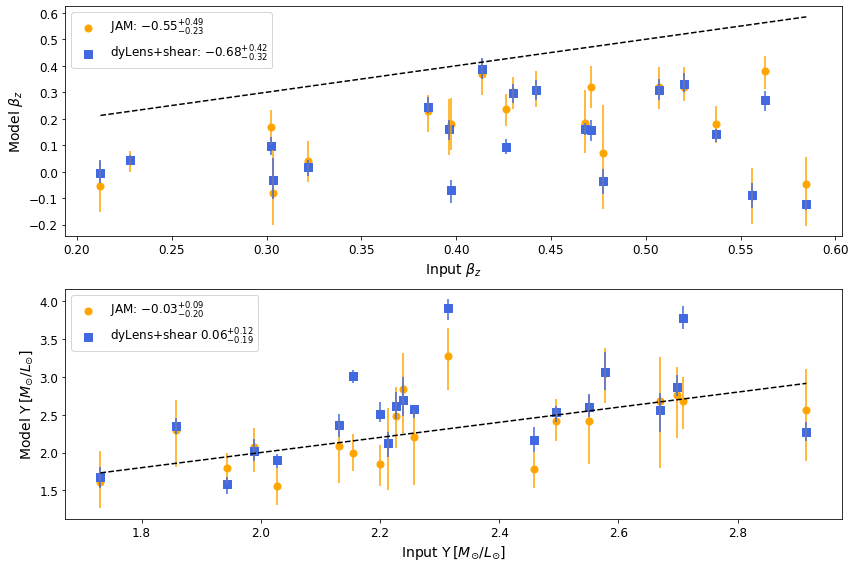

In [10]:
## Bias 
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Criar a figura com subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Adicionar os dados aos subplots
    #  BetaZ

#JAM
m, hi, lo = median_hi_lo( (JAM_beta[:,0] - betaz)/betaz)    
axs[0].scatter(x=betaz, y=JAM_beta[:,0], s=50, color="orange", marker="o",
                      label="JAM: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[0].errorbar(x=betaz, y=JAM_beta[:,0], yerr=abs(JAM_beta[:,1:3].T), 
                      ls="None", color="orange")

#dyLens
m, hi, lo = median_hi_lo( (dyLens_beta[:,0] - betaz)/betaz )    
axs[0].scatter(x=betaz, y=dyLens_beta[:,0], s=50, color="royalblue", marker="s",
                      label="dyLens+shear: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[0].errorbar(x=betaz, y=dyLens_beta[:,0], yerr=abs(dyLens_beta[:,1:3].T), 
                      ls="None", color="royalblue")

axs[0].set_ylabel(r"Model $\beta_z$", size=14)
axs[0].set_xlabel(r"Input $\beta_z$", size=14)
axs[0].legend(fontsize=12)
r = np.linspace(betaz.min(), betaz.max())
axs[0].plot(r, r, color="black", linestyle="--")

    # ML
    
#JAM
m, hi, lo = median_hi_lo( (JAM_ml[:,0] - ml)/ml )    
axs[1].scatter(x=ml, y=JAM_ml[:,0], s=50, color="orange", marker="o",
                      label="JAM: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[1].errorbar(x=ml, y=JAM_ml[:,0], yerr=abs(JAM_ml[:,1:3].T), 
                      ls="None", color="orange")
#dyLens
m, hi, lo = median_hi_lo( (dyLens_ml[:,0] - ml)/ml )    
axs[1].scatter(x=ml, y=dyLens_ml[:,0], s=50, color="royalblue", marker="s",
                      label="dyLens+shear $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[1].errorbar(x=ml, y=dyLens_ml[:,0], yerr=abs(dyLens_ml[:,1:3].T), 
                      ls="None", color="royalblue")

axs[1].set_ylabel(r"Model $\Upsilon \, [M_{\odot}/L_{\odot}]$", size=14)
axs[1].set_xlabel(r"Input $\Upsilon \, [M_{\odot}/L_{\odot}]$", size=14)
axs[1].legend(fontsize=12)
r = np.linspace(ml.min(), ml.max())
axs[1].plot(r, r, color="black", linestyle="--")


# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()

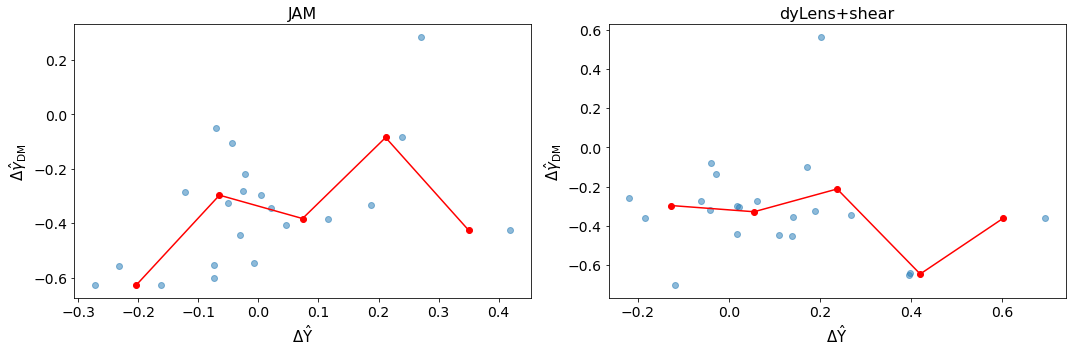

In [11]:
from scipy import stats  # Importe scipy.stats

## Bias 
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

# Criar a figura com subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Adicionar os dados aos subplots
    #  BetaZ

#JAM
x=(JAM_ml[:,0] - ml)/ml
y=(JAM_slope[:,0] - slope)/slope

# Definir o número de grupos e calcular a média
num_bins = 5
bin_means, bin_edges, _ = stats.binned_statistic(x, y, statistic='median', bins=num_bins)

# Encontrar as posições x para a curva média
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Definir o número de grupos e calcular a média
num_bins = 5
bin_means, bin_edges, _ = stats.binned_statistic(x, y, statistic='median', bins=num_bins)

# Plotar o gráfico de dispersão
axs[0].scatter(x, y, alpha=0.5)

# Plotar a curva média
axs[0].plot(bin_centers, bin_means, marker='o', 
            linestyle='-', color='r')

# Configurações adicionais do gráfico
axs[0].set_xlabel(r"${\Delta \hat{\Upsilon} }$", size=15)
axs[0].set_ylabel(r"${\Delta \hat{\gamma}_{\rm DM}}$", size=15)
axs[0].set_title("JAM", size=16)


#dyLens
x=(dyLens_ml[:,0] - ml)/ml
y=(dyLens_slope[:,0] - slope)/slope

# Definir o número de grupos e calcular a média
num_bins = 5
bin_means, bin_edges, _ = stats.binned_statistic(x, y, statistic='median', bins=num_bins)

# Encontrar as posições x para a curva média
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Definir o número de grupos e calcular a média
num_bins = 5
bin_means, bin_edges, _ = stats.binned_statistic(x, y, statistic='median', bins=num_bins)

# Plotar o gráfico de dispersão
axs[1].scatter(x, y, alpha=0.5)

# Plotar a curva média
axs[1].plot(bin_centers, bin_means, marker='o', 
            linestyle='-', color='r')

# Configurações adicionais do gráfico
axs[1].set_xlabel(r"${\Delta \hat{\Upsilon}}$", size=15)
axs[1].set_ylabel(r"${\Delta \hat{\gamma}_{\rm DM}}$", size=15)
axs[1].set_title("dyLens+shear", size=16)


# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()


---